In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/Users/amuratov/gits/EncodeNMF')

In [3]:
import OONMF
import OONMFhelpers as OH
import OONMFmetadata as OMD

In [4]:
import pandas as pd

In [5]:
myNMF = OONMF.NMFobject(16)


In [6]:
myNMF.matrix_input_name('2018-06-08NC16_NNDSVD_Basis.npy', '2018-06-08NC16_NNDSVD_Mixture.npy')


In [7]:
myNMF.read_matrix_input()


In [8]:
myNMF.normalize_matrices()

In [9]:
maxcolor = np.argsort(myNMF.NormedMixture, axis=0)[-1]
maxcolor_vals = np.sort(myNMF.NormedMixture, axis=0)[-1]
secondmaxcolor = np.argsort(myNMF.NormedMixture, axis=0)[-2]
secondmaxcolor_vals = np.sort(myNMF.NormedMixture, axis=0)[-2]

In [10]:
myNMF.define_colors()

In [11]:
WSO = np.array([7,5,15,9,12,14,3,8,13,2,4,6,16,11,10,1]).astype(int) - 1

In [12]:
color_scheme = np.array(myNMF.Comp_colors)[WSO]

In [13]:
maxcolor_bincount = np.bincount(maxcolor)
maxcolor_frac = maxcolor_bincount/np.sum(maxcolor_bincount)


In [14]:
strings_of_labels = ['tissue-invariant', 'fibroblast1', 'embryonic', 'fibroblast2', 'lymphoid', 'epithelial / kidney (cancer)', 'placenta','neuronal','cardiac','fetal kidney','fetal lung','musculoskeletal',\
                     'digestive','vascular / endothelial','HSC / myeloid / erythroid', 'epithelial']
strings_of_labels = np.array(strings_of_labels)

<Figure size 432x288 with 0 Axes>

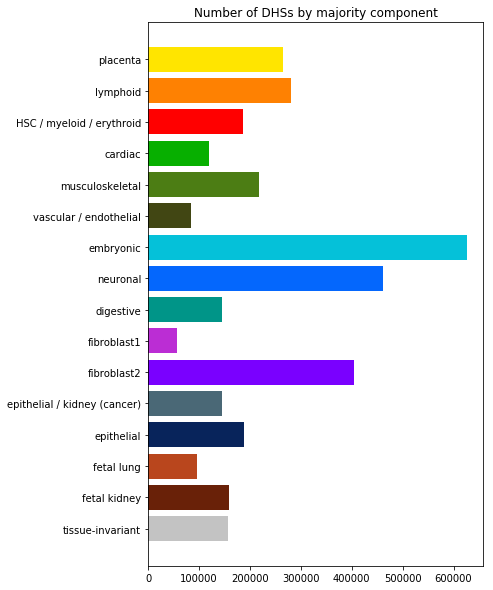

In [15]:
plt.clf()
plt.figure(figsize=(6,10))
plt.barh(['C'+str(i+1) for i in range(16)], maxcolor_bincount[WSO][::-1], color=color_scheme[::-1], tick_label=strings_of_labels[WSO][::-1])
plt.title('Number of DHSs by majority component')
plt.show()

#### note: some DHSs have no secondary component at all (all loading in one component)

In [16]:
secondmaxcolor_vals_cut = secondmaxcolor_vals>0

In [17]:
# number of DHSs with no secondary component at all
len(secondmaxcolor_vals_cut[~secondmaxcolor_vals_cut])


372894

In [18]:
secondmaxcolor_bincount = np.bincount(secondmaxcolor[secondmaxcolor_vals_cut])
secondmaxcolor_frac = secondmaxcolor_bincount/np.sum(secondmaxcolor_bincount)

<Figure size 432x288 with 0 Axes>

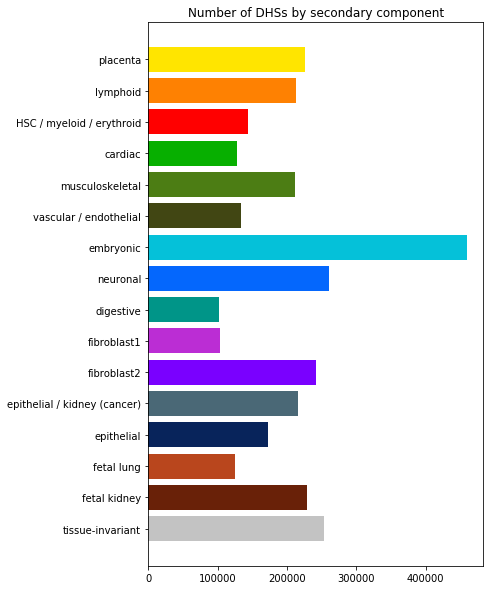

In [19]:
plt.clf()
plt.figure(figsize=(6,10))
plt.barh(['C'+str(i+1) for i in range(16)], secondmaxcolor_bincount[WSO][::-1], color=color_scheme[::-1], tick_label=strings_of_labels[WSO][::-1])
plt.title('Number of DHSs by secondary component')
plt.show()

### or if you want to see them all at once
values along the diagonal indicate number of DHSs with a specific primary component but no secondary component.



In [20]:
import OONMFvis as OV

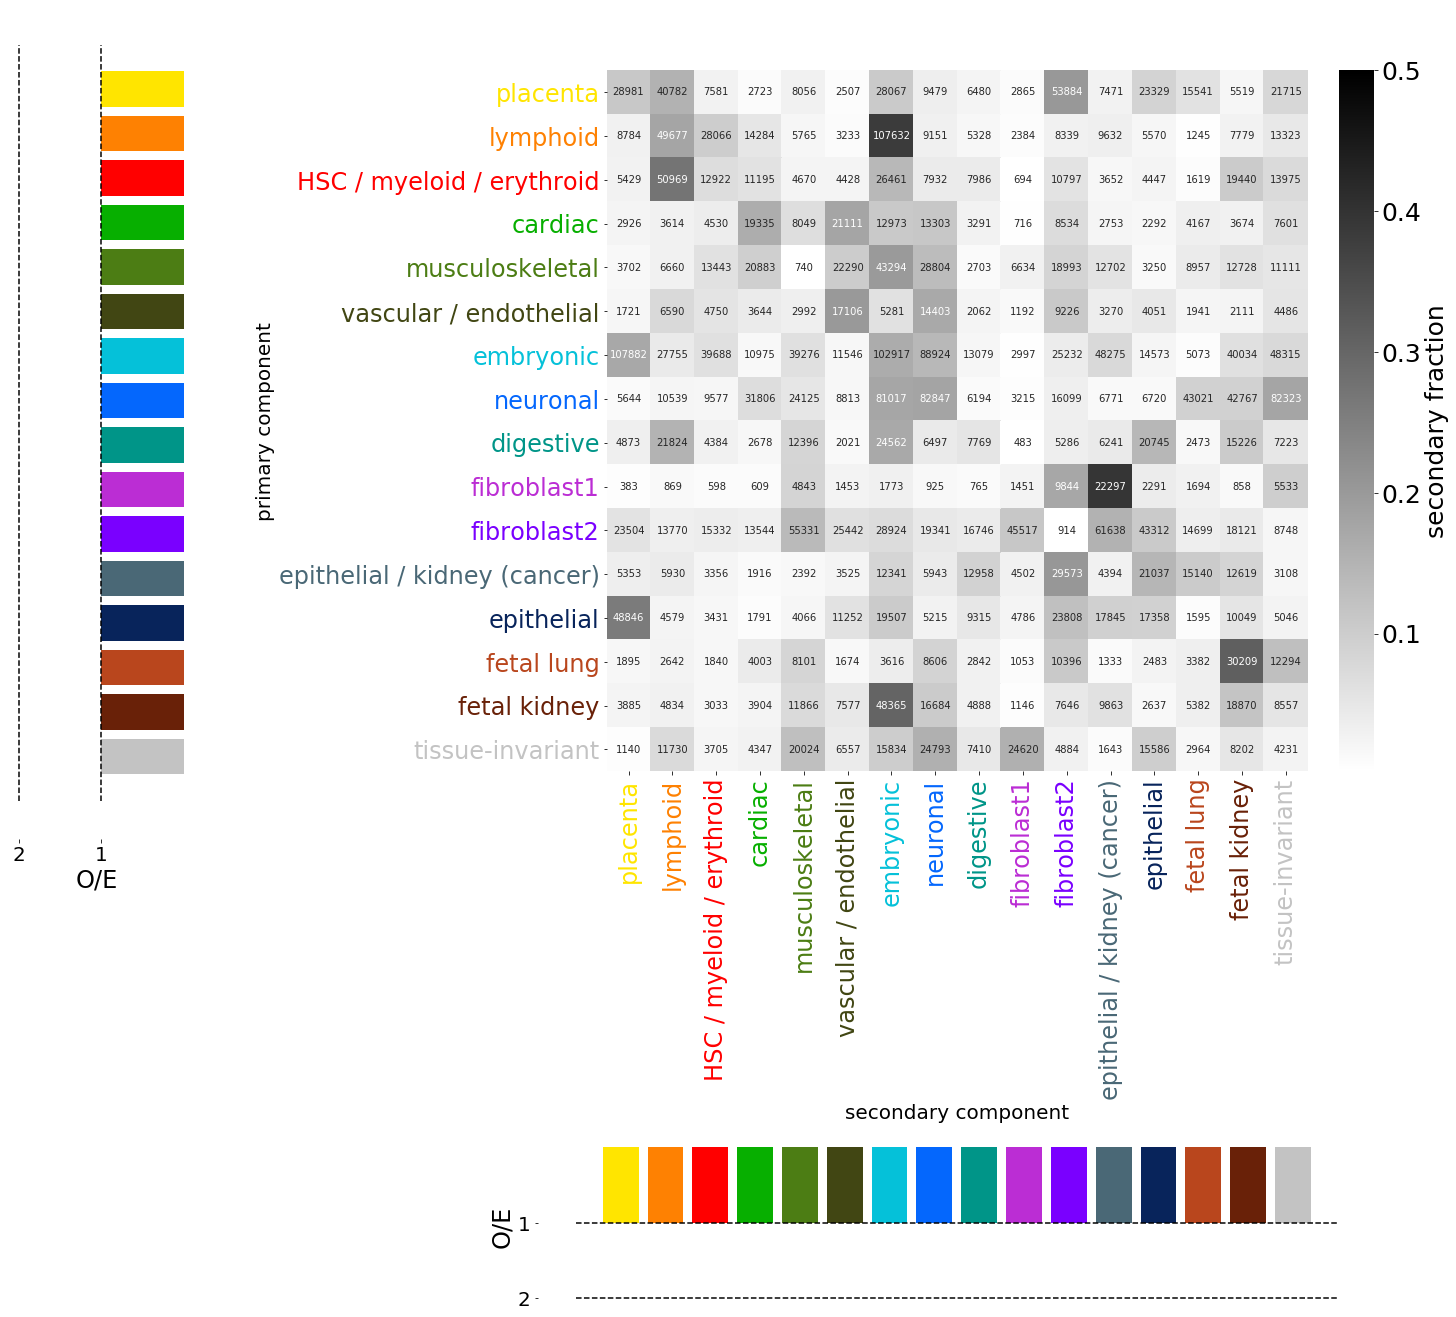

In [21]:
OV.big_grid_plot(maxcolor>-1, maxcolor, secondmaxcolor, maxcolor_vals, secondmaxcolor_vals, WSO, color_scheme,strings_of_labels)

# note:
### the colorbar represents the per-row (primary color)  fractional prevelance of each column (secondary color) . THe bar graphs below the grid show the observed over expected for each primary and secondary combo. We will be making more of these plots, but in this case, the expected is just the full distribution of DHSs, so there is no deviation

#  chromatic group definition:

### One approach to extend the analysis is to divide DHSs into a small number of groups based on how dominated they are by a single component. We have already shown that DHSs that are described by a single non-zero component are likely to occur in biosamples from a single anatomical system, while those with more than one non-zero component are likely to occur in biosamples from several different anatomical systems. 

### here, we segment DHSs into four groups based on the relative normalized loading in a primary and secondary component

- G1 - group 1 - "monochromatic DHSs" - these DHSs have at least 50% of their total NMF loading signal in a single component, and do not have more than 25% in any other component. These DHSs occur primarily in biosamples from a single system.

- G2 - group 2 - "dichromatic DHSs " - these DHSs have at least 50% of their total NMF loading signal in a single component, and have at least 25% of their total NMF loading signal in a second component. These DHSs generally occur in biosamples from one or two anatomical systems. 

- G3 - group 3 - "polychromatic DHSs " - these DHSs have less than 50% of their toatl NMF loading in any individual component. However, they do have at least 25% in their majority component, as well as 25% in a second component. These DHSs are likely to occur in several different anatomical system, often more than two. 

- G4 - group 4 - "panchromatic DHSs " - these DHSs have no more than 50% of their total NMF loading in any component, and also do not have a secondary component that constitutes 25% of the total NMF loadings. These DHSs are often represented by several different NMF components, and are likely to be found in biosamples from many different antaomical systems, including some sites that are found in all biosamples. 



#### First, we provide a conceptual illustration of what primary and secondary component distributions look like here.

<Figure size 432x288 with 0 Axes>

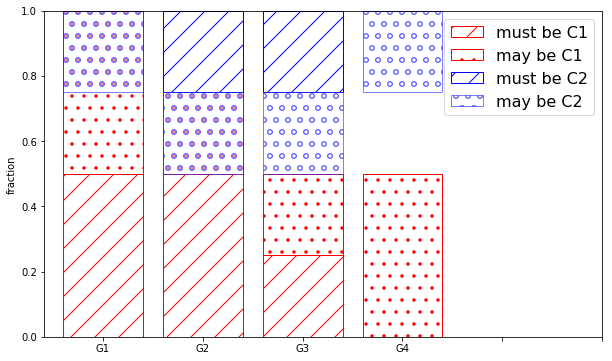

In [11]:
plt.clf()
plt.figure(figsize=(10,6))
C1required = plt.bar([1,2,3,4], [0.5, 0.5, 0.25, 0], hatch='/', edgecolor='r', color='w') #primary component
C1optional = plt.bar([1,2,3,4], [0.5,0.25, 0.25, 0.5], bottom=[0.5, 0.5, 0.25, 0], color='w')
for bar in C1optional:
    bar.set_edgecolor('r')
    bar.set_hatch('.')
C2required = plt.bar([1,2,3,4], [0, 0.25, 0.25, 0], bottom=[1.0, 0.75, 0.75, 1.0], hatch='/', edgecolor='b', color='w') #primary component
C2optional = plt.bar([1,2,3,4], [0.25,0.25, 0.25, 0.25], bottom=[0.75, 0.5, 0.5, 0.75], color='w')
for bar in C2optional:
    bar.set_edgecolor('b')
    bar.set_hatch('o')
    bar.set_alpha(0.5)
plt.xticks([1,2,3,4,5, 6], ['G1', 'G2', 'G3', 'G4', '', ''])
plt.ylabel('fraction')

plt.legend(['must be C1', 'may be C1', 'must be C2', 'may be C2'], fontsize=16)
plt.ylim([0,1])
plt.savefig('Sasha_group_definition.pdf')
plt.show()
plt.close()

#### defining these groups is fairly straightforward

In [23]:
G1cut = (secondmaxcolor_vals<=0.25) * (maxcolor_vals>0.5) 
G2cut = (secondmaxcolor_vals>0.25) * (maxcolor_vals>0.5) 
G3cut = (secondmaxcolor_vals>0.25) * (maxcolor_vals<=0.5) 
G4cut = (secondmaxcolor_vals<=0.25) * (maxcolor_vals<=0.5) 

### lets see the total number of DHSs in each of the four groups

In [29]:
sumlist = [np.sum(G1cut), np.sum(G2cut), np.sum(G3cut), np.sum(G4cut)]

<Figure size 432x288 with 0 Axes>

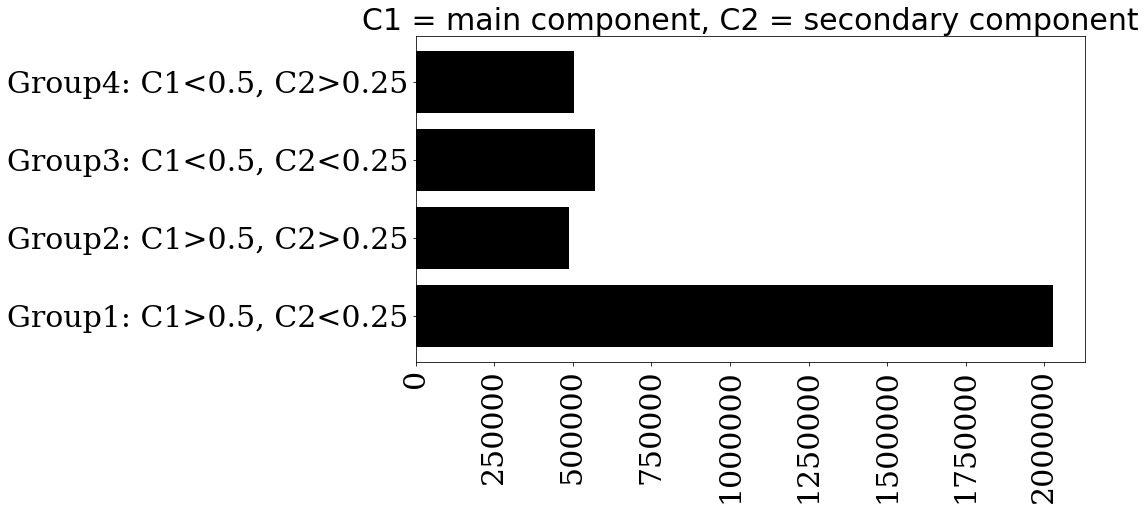

In [30]:
plt.clf()
plt.figure(figsize=(12,6))
plt.barh([(i+1) for i in range(4)], sumlist, color='k', tick_label=['Group1: C1>0.5, C2<0.25', 'Group2: C1>0.5, C2>0.25', 'Group3: C1<0.5, C2<0.25', 'Group4: C1<0.5, C2>0.25'])
ax = plt.gca()
ticklabels = ax.get_xticklabels()
for label in ticklabels:
    label.set_fontsize(30)
    label.set_family('serif')
    label.set_rotation(90)
ticklabels = ax.get_yticklabels()
for label in ticklabels:
    label.set_fontsize(30)
    label.set_family('serif')
plt.title('C1 = main component, C2 = secondary component', fontsize=30)
plt.show()

### although G1 dominates the distribution with about 4/7ths of the total number of DHSs (2 million), each of the other chromatic groups has about 500,000 sites, representing 1/7th of the total DHS count

In [31]:
G1_main_mean = maxcolor_vals[(secondmaxcolor_vals<0.25) * (maxcolor_vals>0.5)  ].mean()
G1_main_std = maxcolor_vals[(secondmaxcolor_vals<0.25) * (maxcolor_vals>0.5)  ].std()
G1_second_mean = secondmaxcolor_vals[(secondmaxcolor_vals<0.25) * (maxcolor_vals>0.5)  ].mean()
G1_second_std = secondmaxcolor_vals[(secondmaxcolor_vals<0.25) * (maxcolor_vals>0.5)  ].std()

#Group 2 - strong dominant, strong secondary
G2_main_mean = maxcolor_vals[(secondmaxcolor_vals>=0.25) * (maxcolor_vals>0.5)  ].mean()
G2_main_std = maxcolor_vals[(secondmaxcolor_vals>=0.25) * (maxcolor_vals>0.5)  ].std()
G2_second_mean = secondmaxcolor_vals[(secondmaxcolor_vals>=0.25) * (maxcolor_vals>0.5)  ].mean()
G2_second_std = secondmaxcolor_vals[(secondmaxcolor_vals>=0.25) * (maxcolor_vals>0.5)  ].std()


#Group 3 - weak dominant, weak secondary
G3_main_mean = maxcolor_vals[(secondmaxcolor_vals<0.25) * (maxcolor_vals<=0.5)  ].mean()
G3_main_std = maxcolor_vals[(secondmaxcolor_vals<0.25) * (maxcolor_vals<=0.5)  ].std()
G3_second_mean = secondmaxcolor_vals[(secondmaxcolor_vals<0.25) * (maxcolor_vals<=0.5)  ].mean()
G3_second_std = secondmaxcolor_vals[(secondmaxcolor_vals<0.25) * (maxcolor_vals<=0.5)  ].std()

#Group 4 - weak dominant, weak secondary
G4_main_mean = maxcolor_vals[(secondmaxcolor_vals>=0.25) * (maxcolor_vals<=0.5)  ].mean()
G4_main_std = maxcolor_vals[(secondmaxcolor_vals>=0.25) * (maxcolor_vals<=0.5)  ].std()
G4_second_mean = secondmaxcolor_vals[(secondmaxcolor_vals>=0.25) * (maxcolor_vals<=0.5)  ].mean()
G4_second_std = secondmaxcolor_vals[(secondmaxcolor_vals>=0.25) * (maxcolor_vals<=0.5)  ].std()

<Figure size 432x288 with 0 Axes>

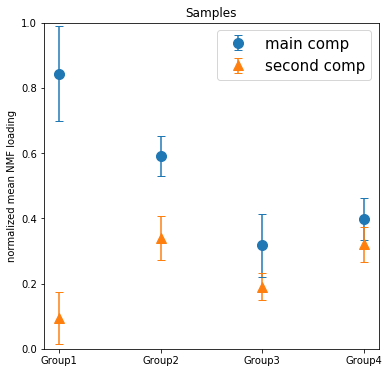

In [32]:
plt.clf()
plt.figure(figsize=(6,6))
plt.errorbar([1,2,3,4], [G1_main_mean, G2_main_mean, G3_main_mean, G4_main_mean], yerr=[G1_main_std, G2_main_std, G3_main_std, G4_main_std], fmt='o', capsize=4, ms=10 )
plt.errorbar([1,2,3,4], [G1_second_mean, G2_second_mean, G3_second_mean, G4_second_mean], yerr=[G1_second_std, G2_second_std, G3_second_std, G4_second_std], fmt='^', capsize=4, ms=10 )

plt.xticks([1,2,3,4], ['Group1', 'Group2', 'Group3', 'Group4'])
plt.ylim([0,1])
plt.legend(['main comp', 'second comp'], fontsize=15)
plt.ylabel('normalized mean NMF loading')
plt.title('Samples')

plt.show()

We look at the total numbers and plot them here

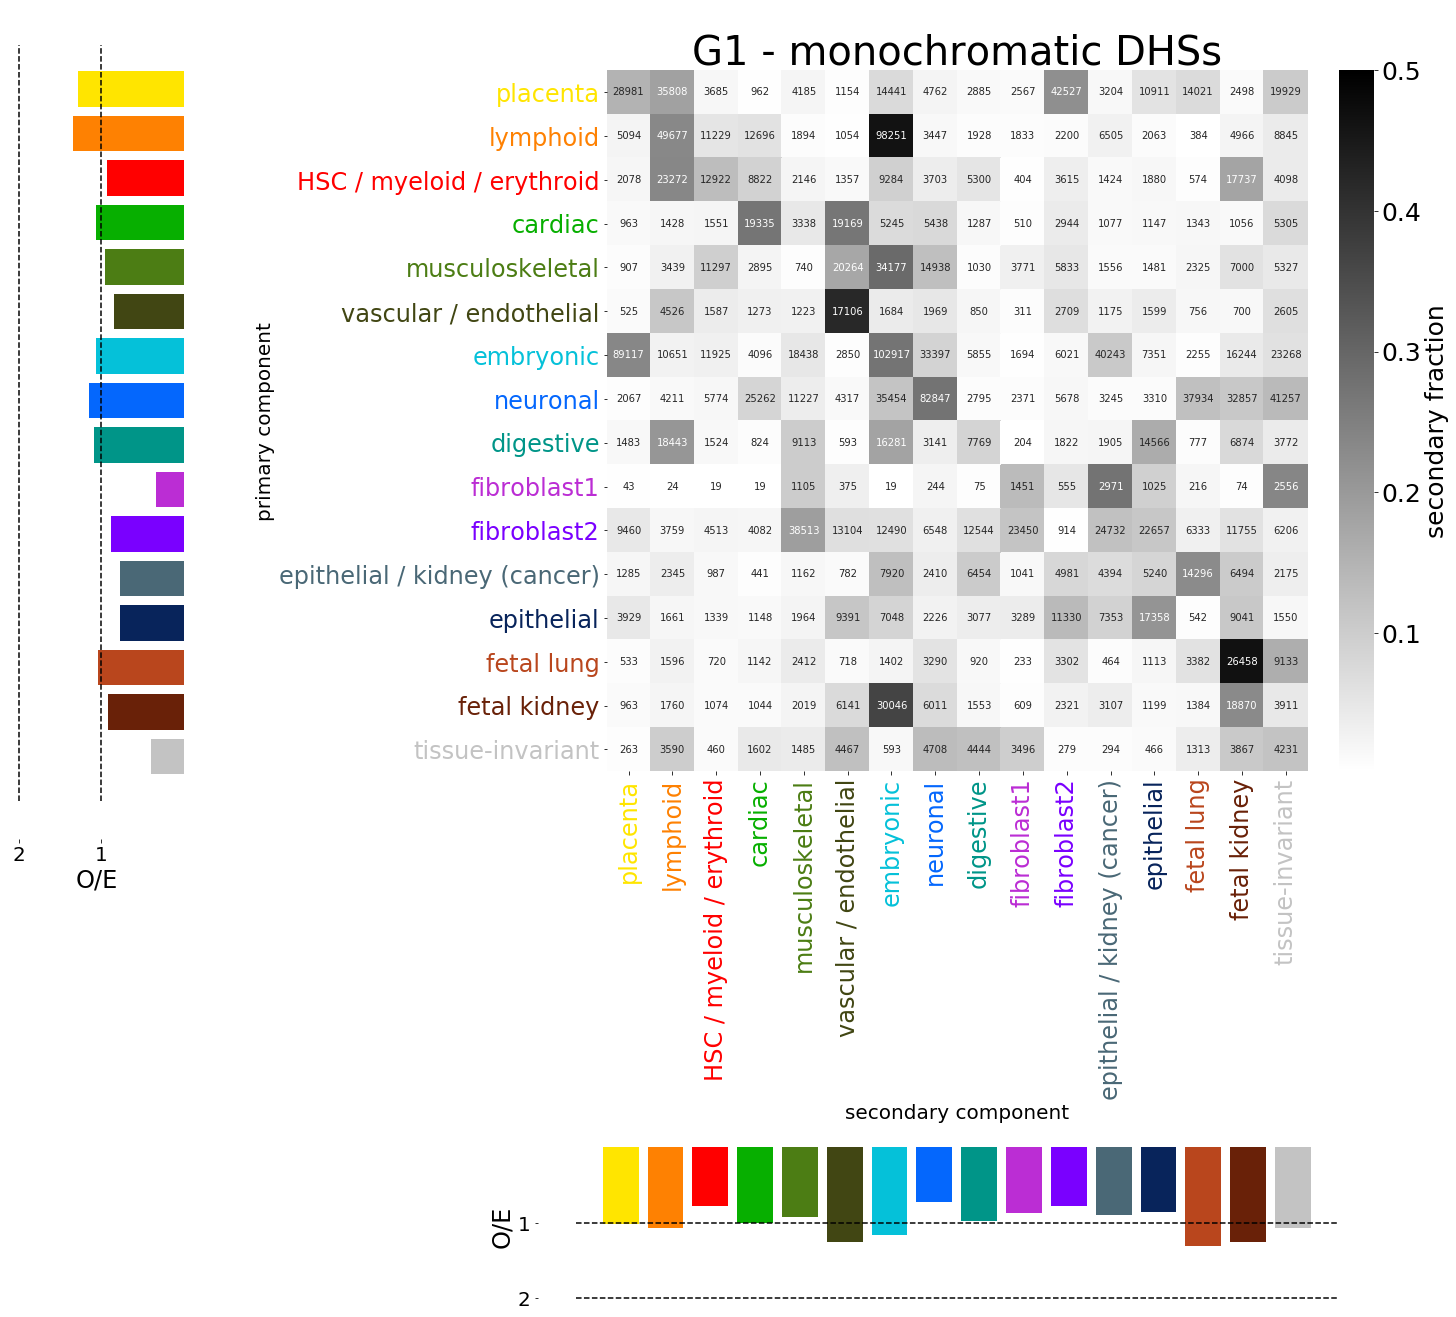

In [25]:
OV.big_grid_plot(G1cut, maxcolor, secondmaxcolor, maxcolor_vals, secondmaxcolor_vals, WSO, color_scheme,strings_of_labels, plt_title='G1 - monochromatic DHSs')

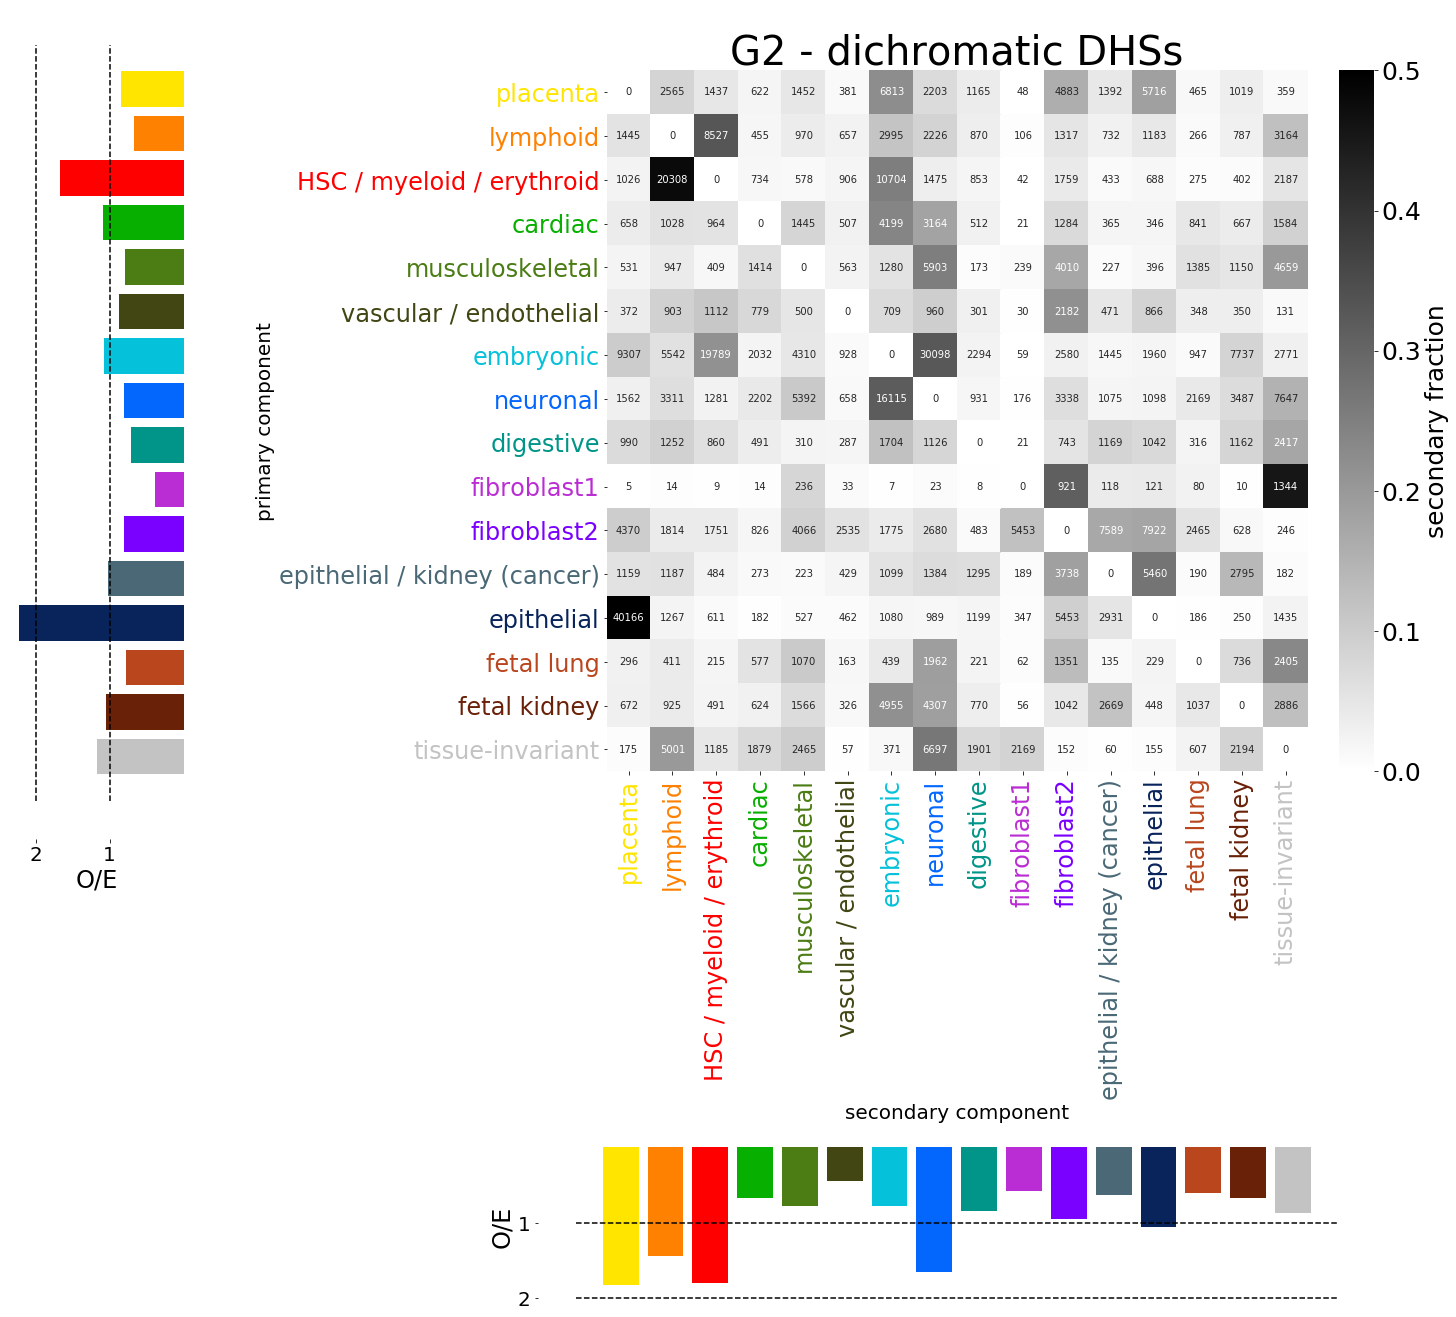

In [26]:
OV.big_grid_plot(G2cut, maxcolor, secondmaxcolor, maxcolor_vals, secondmaxcolor_vals, WSO, color_scheme,strings_of_labels, plt_title='G2 - dichromatic DHSs')

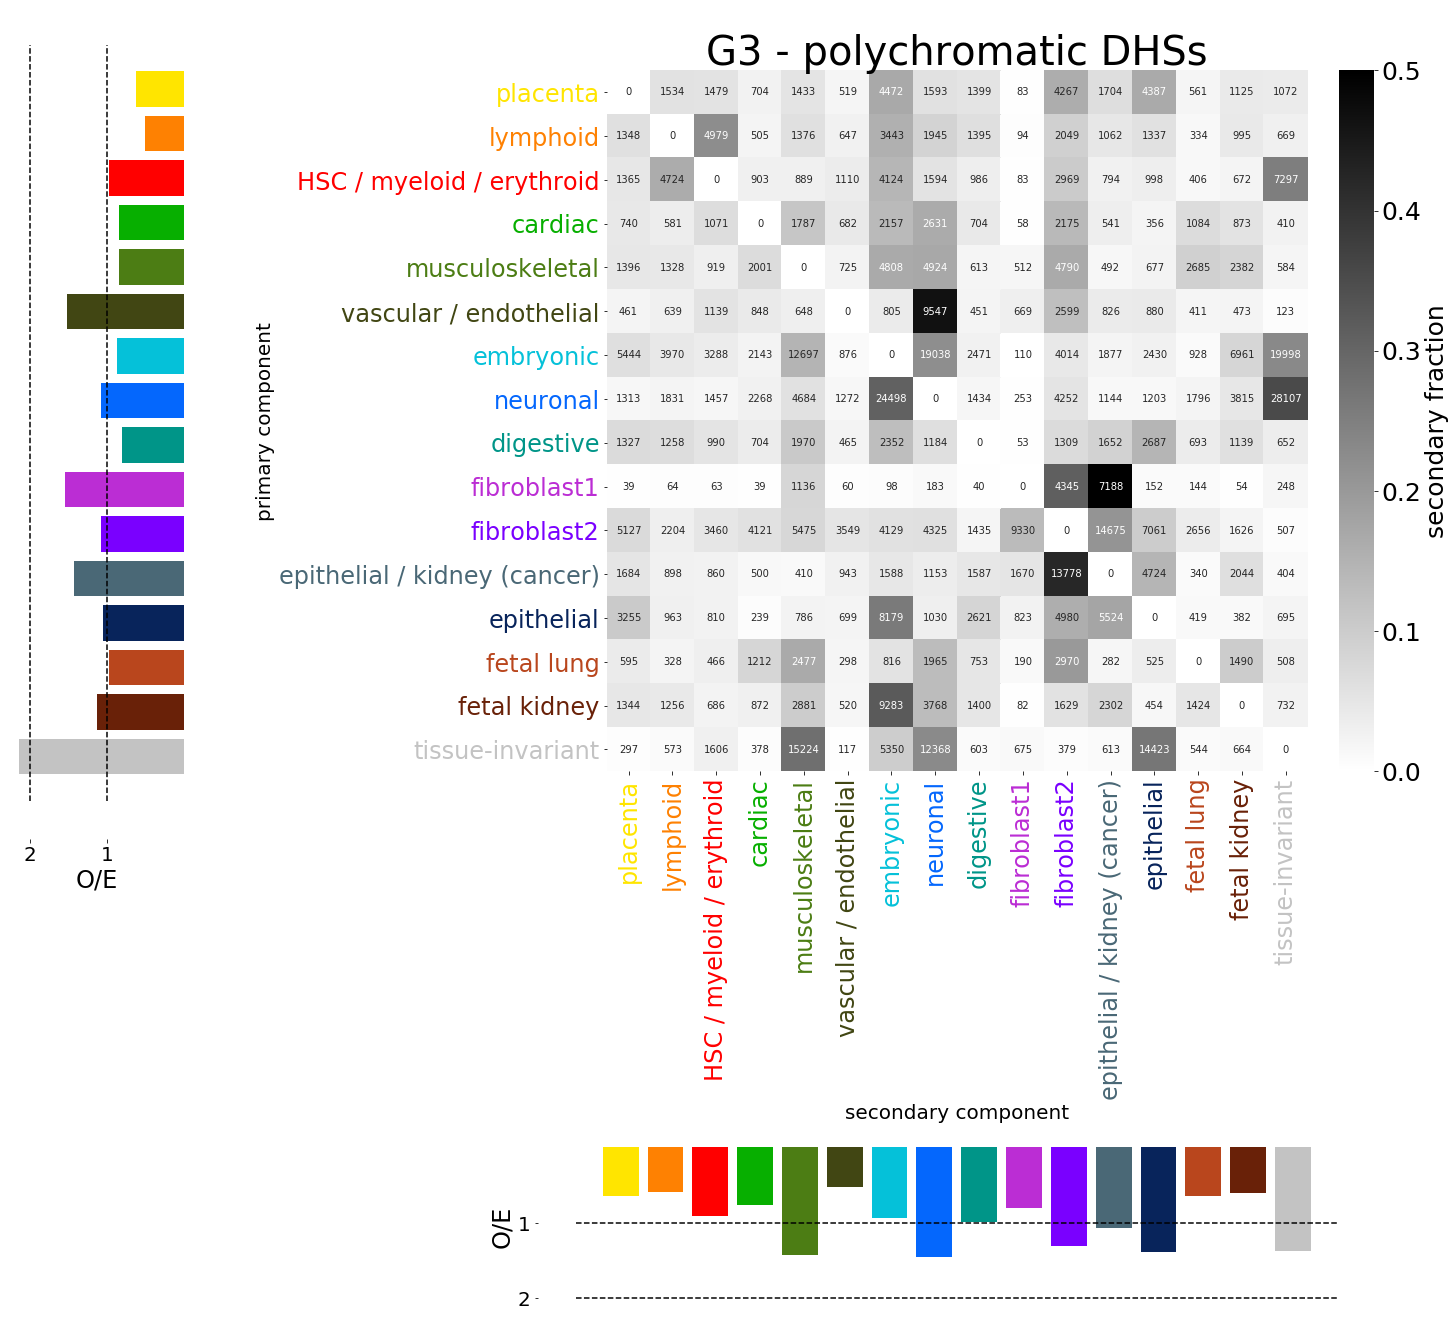

In [27]:
OV.big_grid_plot(G3cut, maxcolor, secondmaxcolor, maxcolor_vals, secondmaxcolor_vals, WSO, color_scheme,strings_of_labels, plt_title='G3 - polychromatic DHSs')

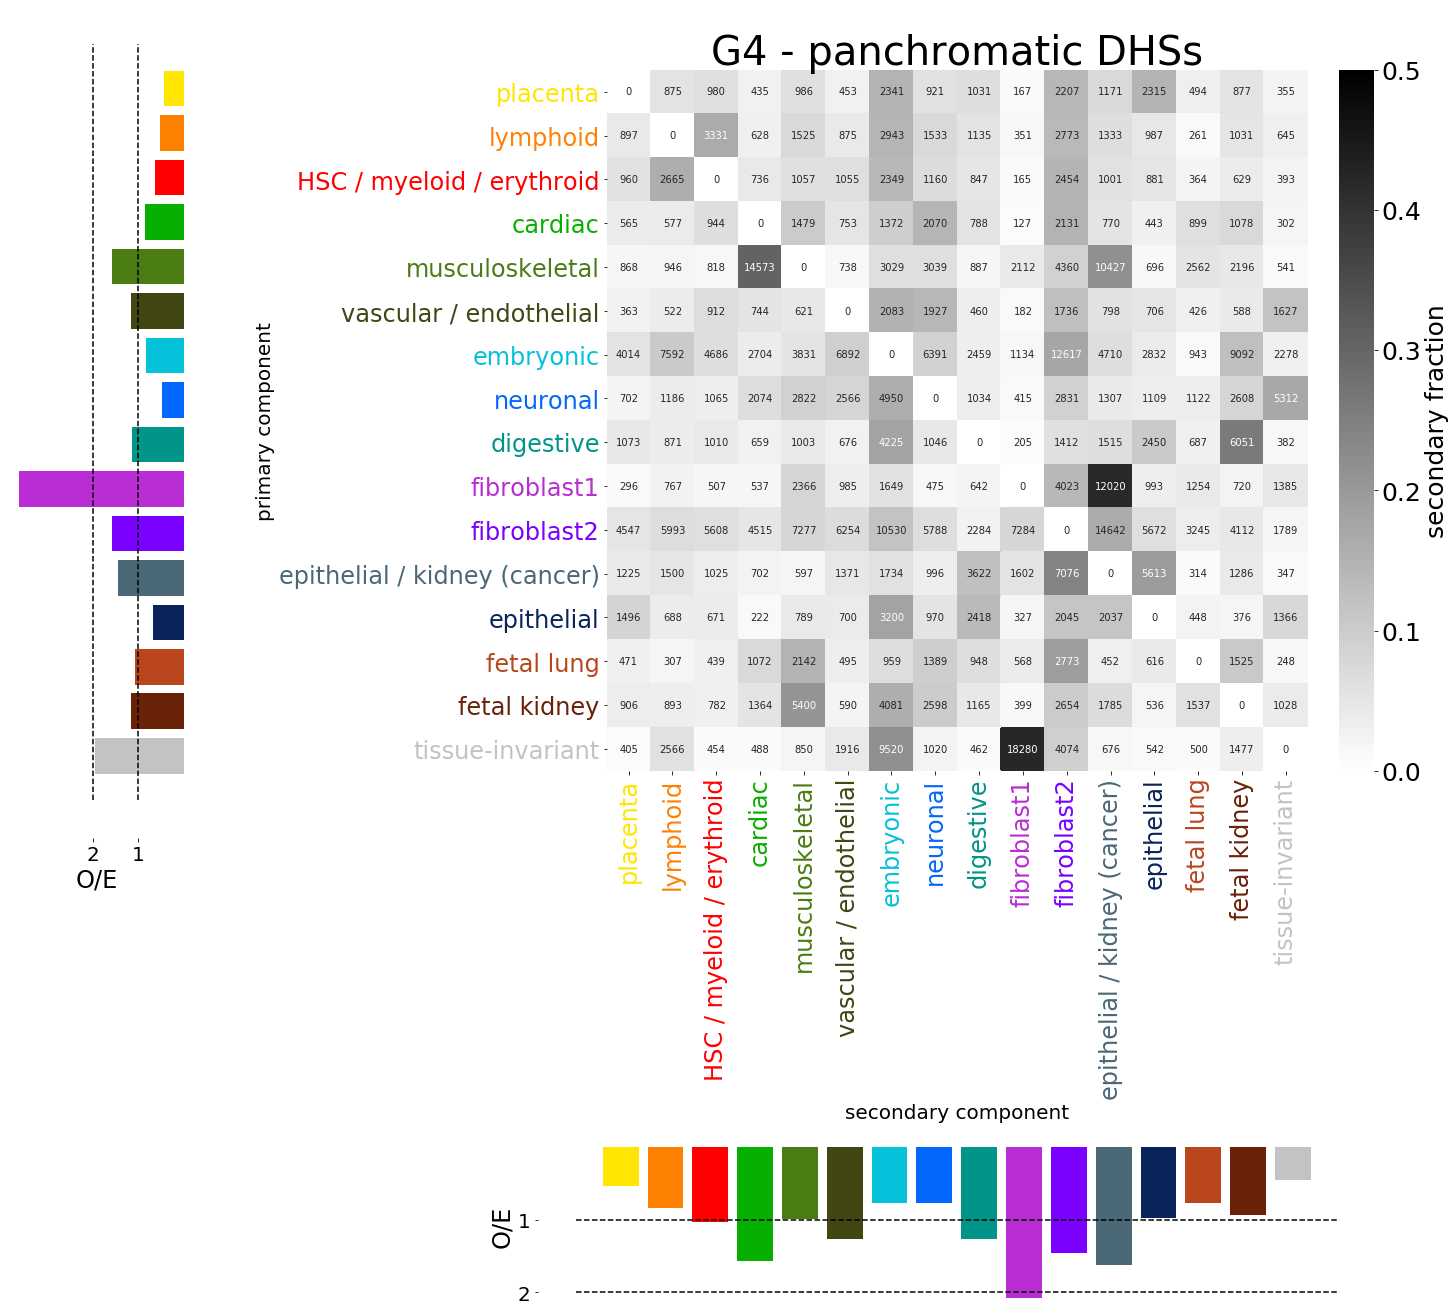

In [28]:
OV.big_grid_plot(G4cut, maxcolor, secondmaxcolor, maxcolor_vals, secondmaxcolor_vals, WSO, color_scheme,strings_of_labels, plt_title='G4 - panchromatic DHSs')

### Some clear patterns emerge 
- fibroblast1 and tissue invariant are overrepresented in G3 and G4, while generally being underepresented in G1 and G2, especially as primary components
- Lymphoid and myeloid couple together in G2
- Epithelial-placenta is the most common combination in G2. These generally belong to a specific group of biosamples.

## We can also look at the whole grid as an observed over expected distribution

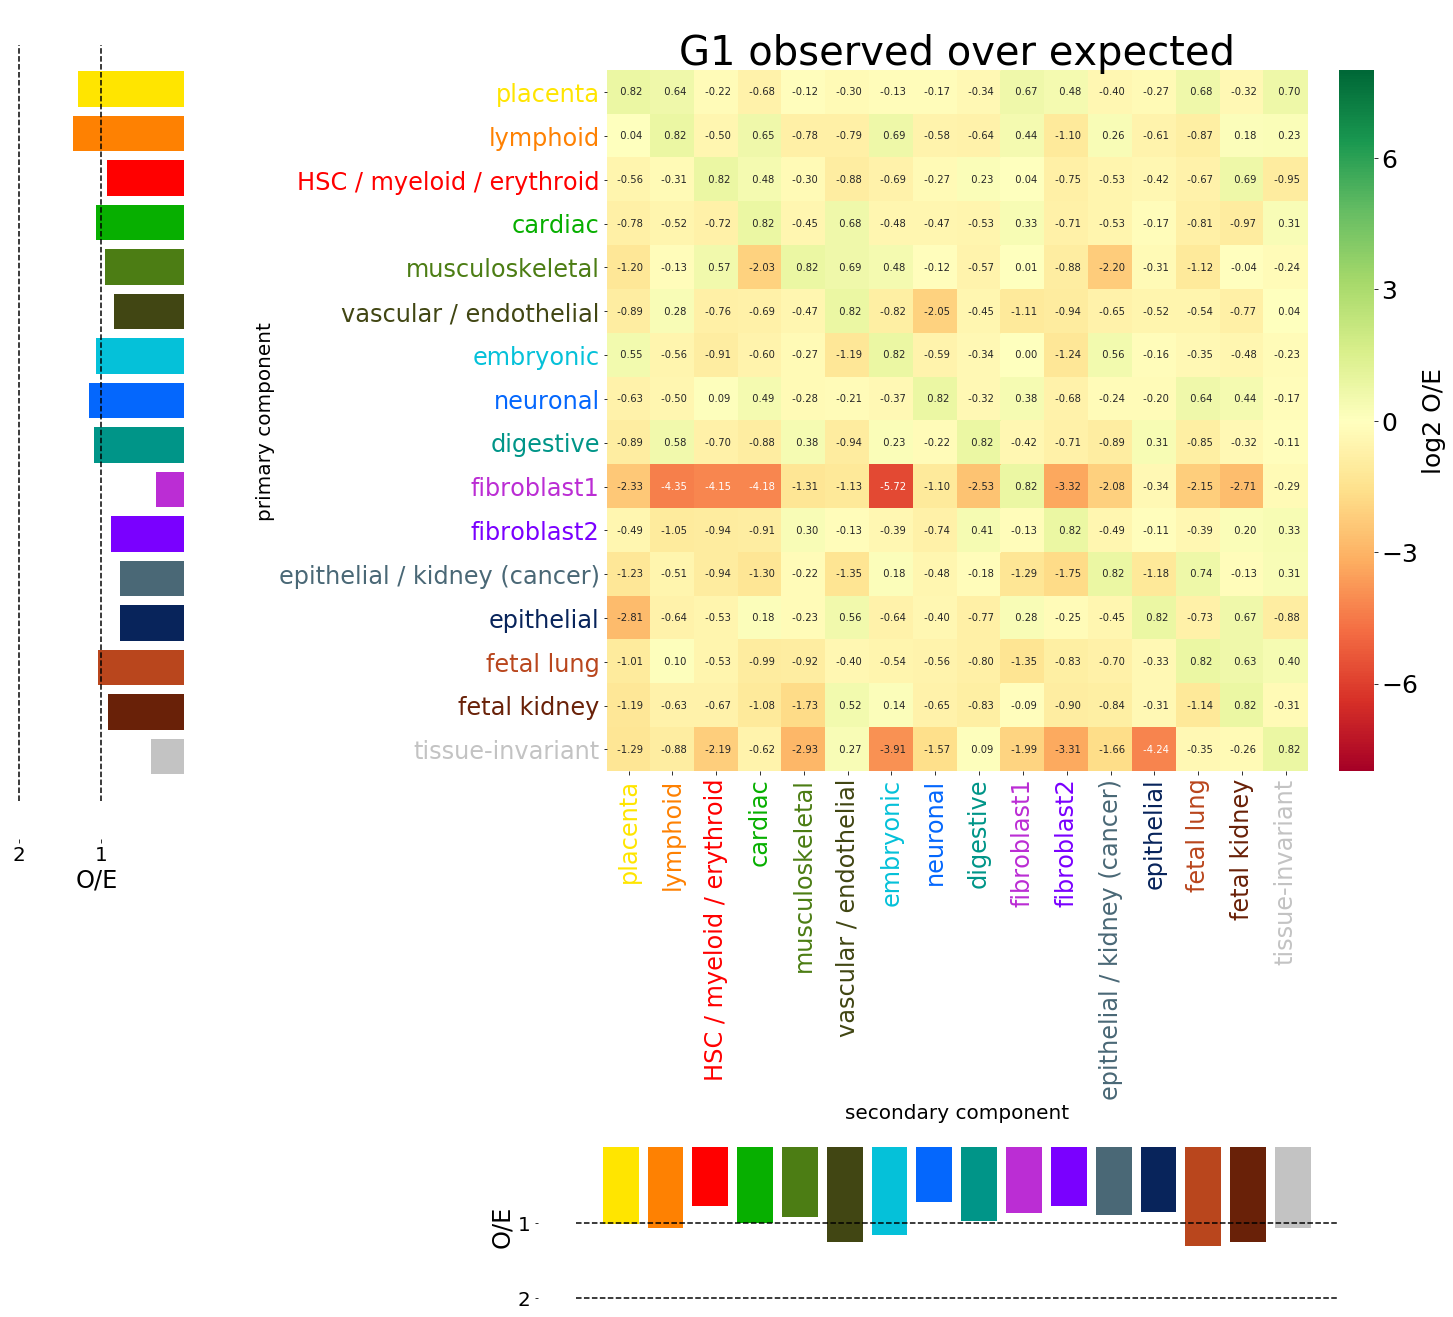

In [35]:
EM = OV.return_expected_matrix(maxcolor>-1, maxcolor, secondmaxcolor, secondmaxcolor_vals,strings_of_labels)
OV.big_grid_plot(G1cut, maxcolor, secondmaxcolor, maxcolor_vals, secondmaxcolor_vals, WSO, color_scheme,strings_of_labels, plt_title='G1 observed over expected',  logOOEmode = True, do_row_normalized_shading=False, ExpectedMatrix=EM)

#### G1 generally does not have many surprises here. It represents more than half of DHSs, so it's pretty reasonalbe to see small fold changes in most combinations. The ones that jump out are Fibroblast1 and Tissue invariant primary DHSs, which are significantly undererepresented. 

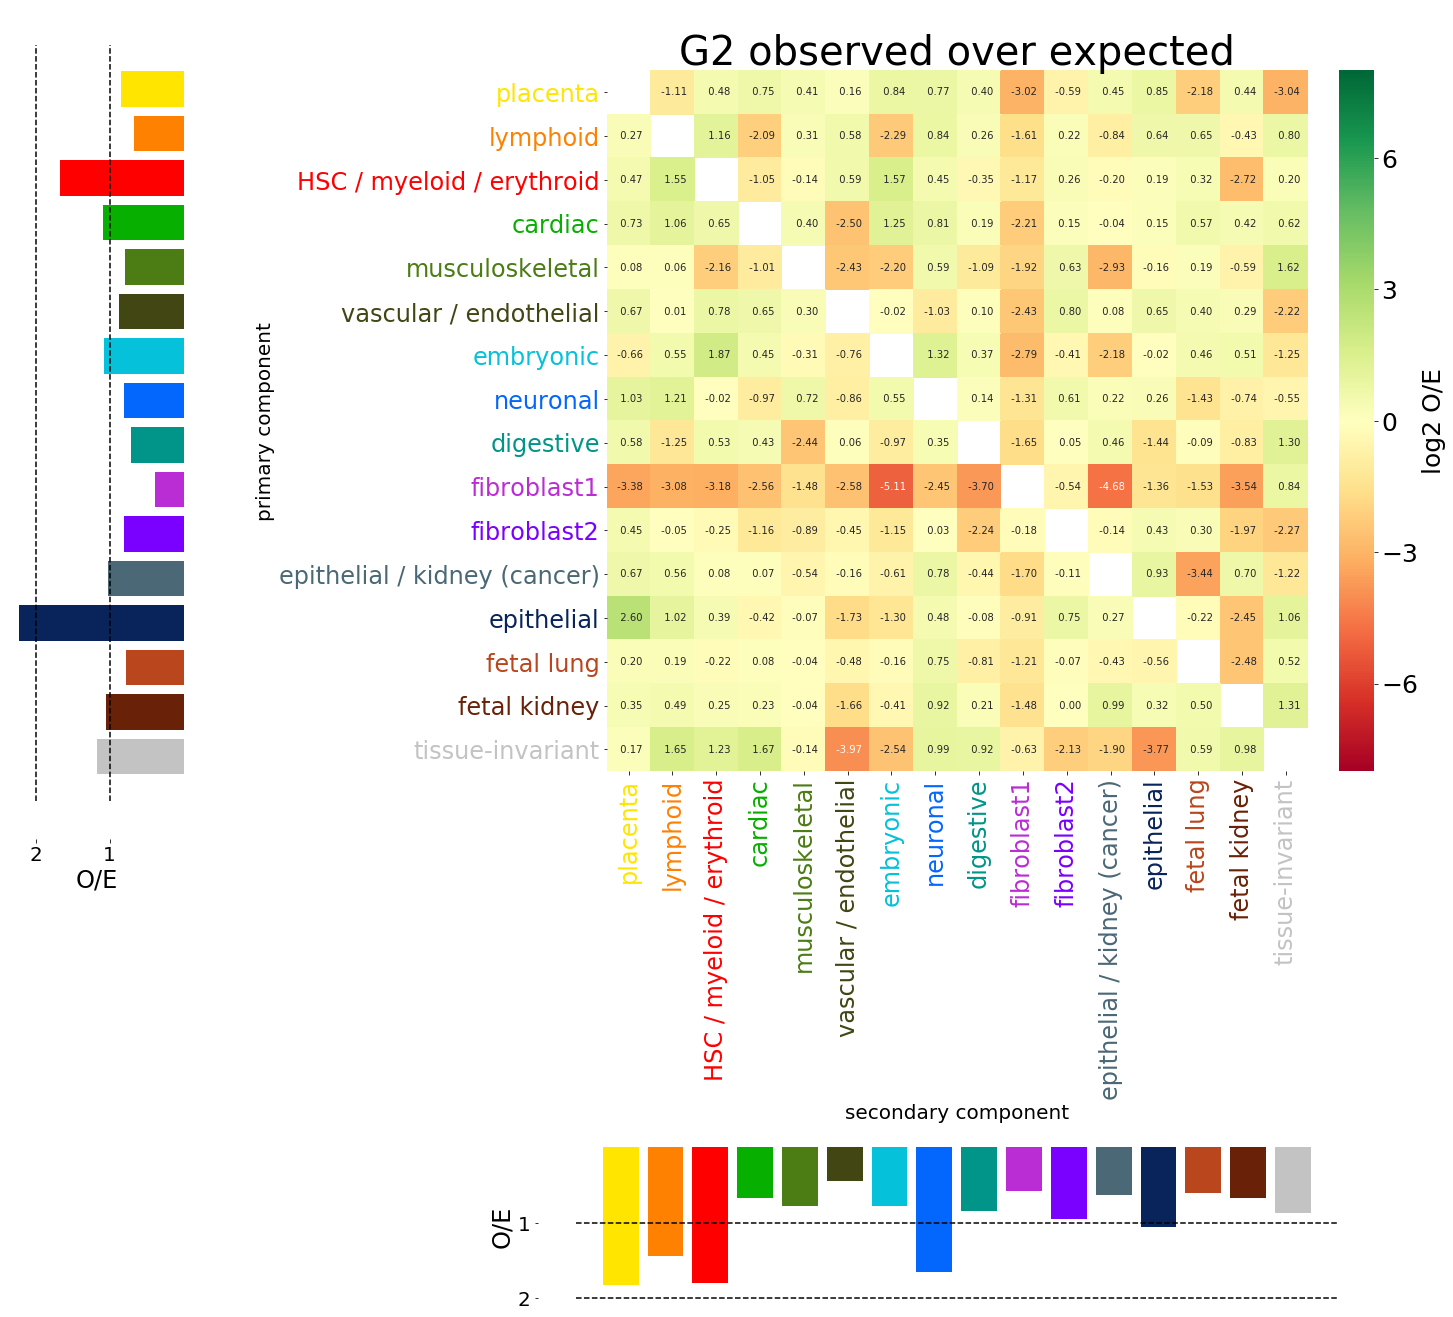

In [36]:
OV.big_grid_plot(G2cut, maxcolor, secondmaxcolor, maxcolor_vals, secondmaxcolor_vals, WSO, color_scheme,strings_of_labels, plt_title='G2 observed over expected',  logOOEmode = True, do_row_normalized_shading=False, ExpectedMatrix=EM)

### as previously mentioned, lymphoid + myeloid and epithelial + placenta jump out. Also, neuronal is a common secondary component almost across the board. 

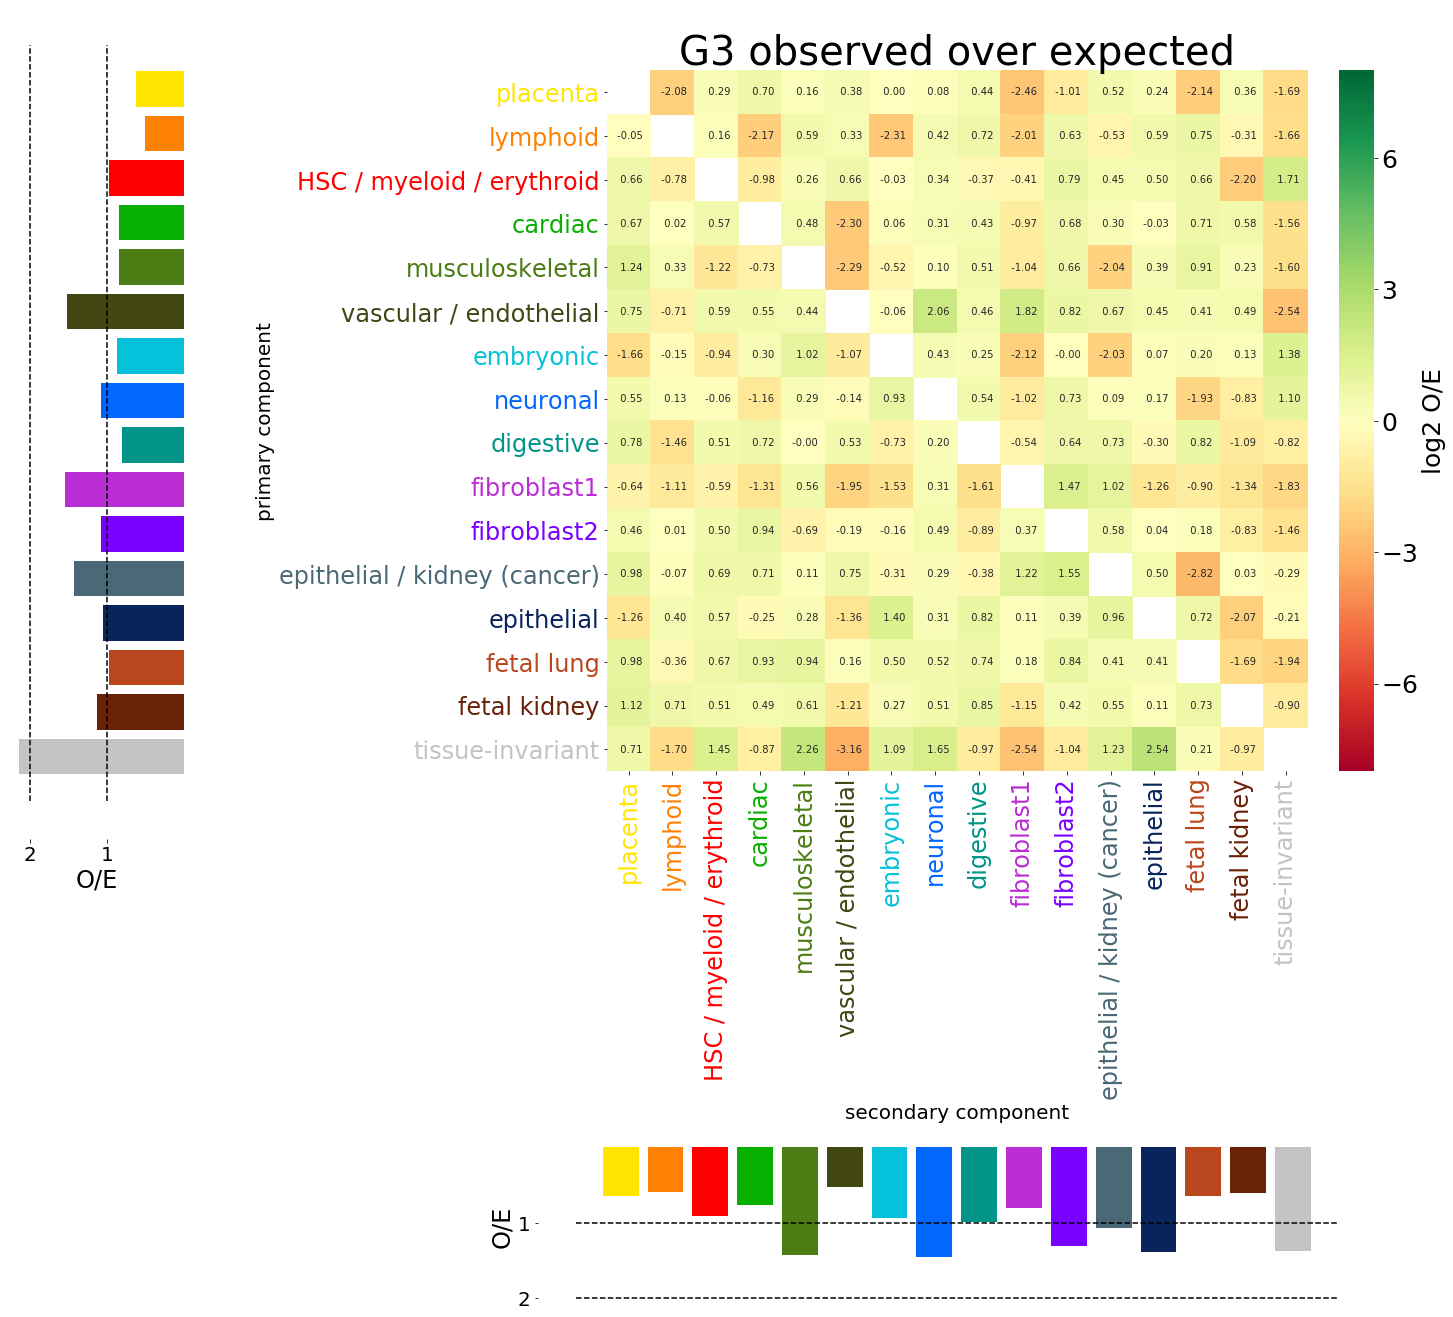

In [37]:
OV.big_grid_plot(G3cut, maxcolor, secondmaxcolor, maxcolor_vals, secondmaxcolor_vals, WSO, color_scheme,strings_of_labels, plt_title='G3 observed over expected',  logOOEmode = True, do_row_normalized_shading=False, ExpectedMatrix=EM)

### With G3, we begin to see tissue invariant DHSs being significantly overrepresented for many component combinations. Fibrolast2 is also growing in prominence for many components. 

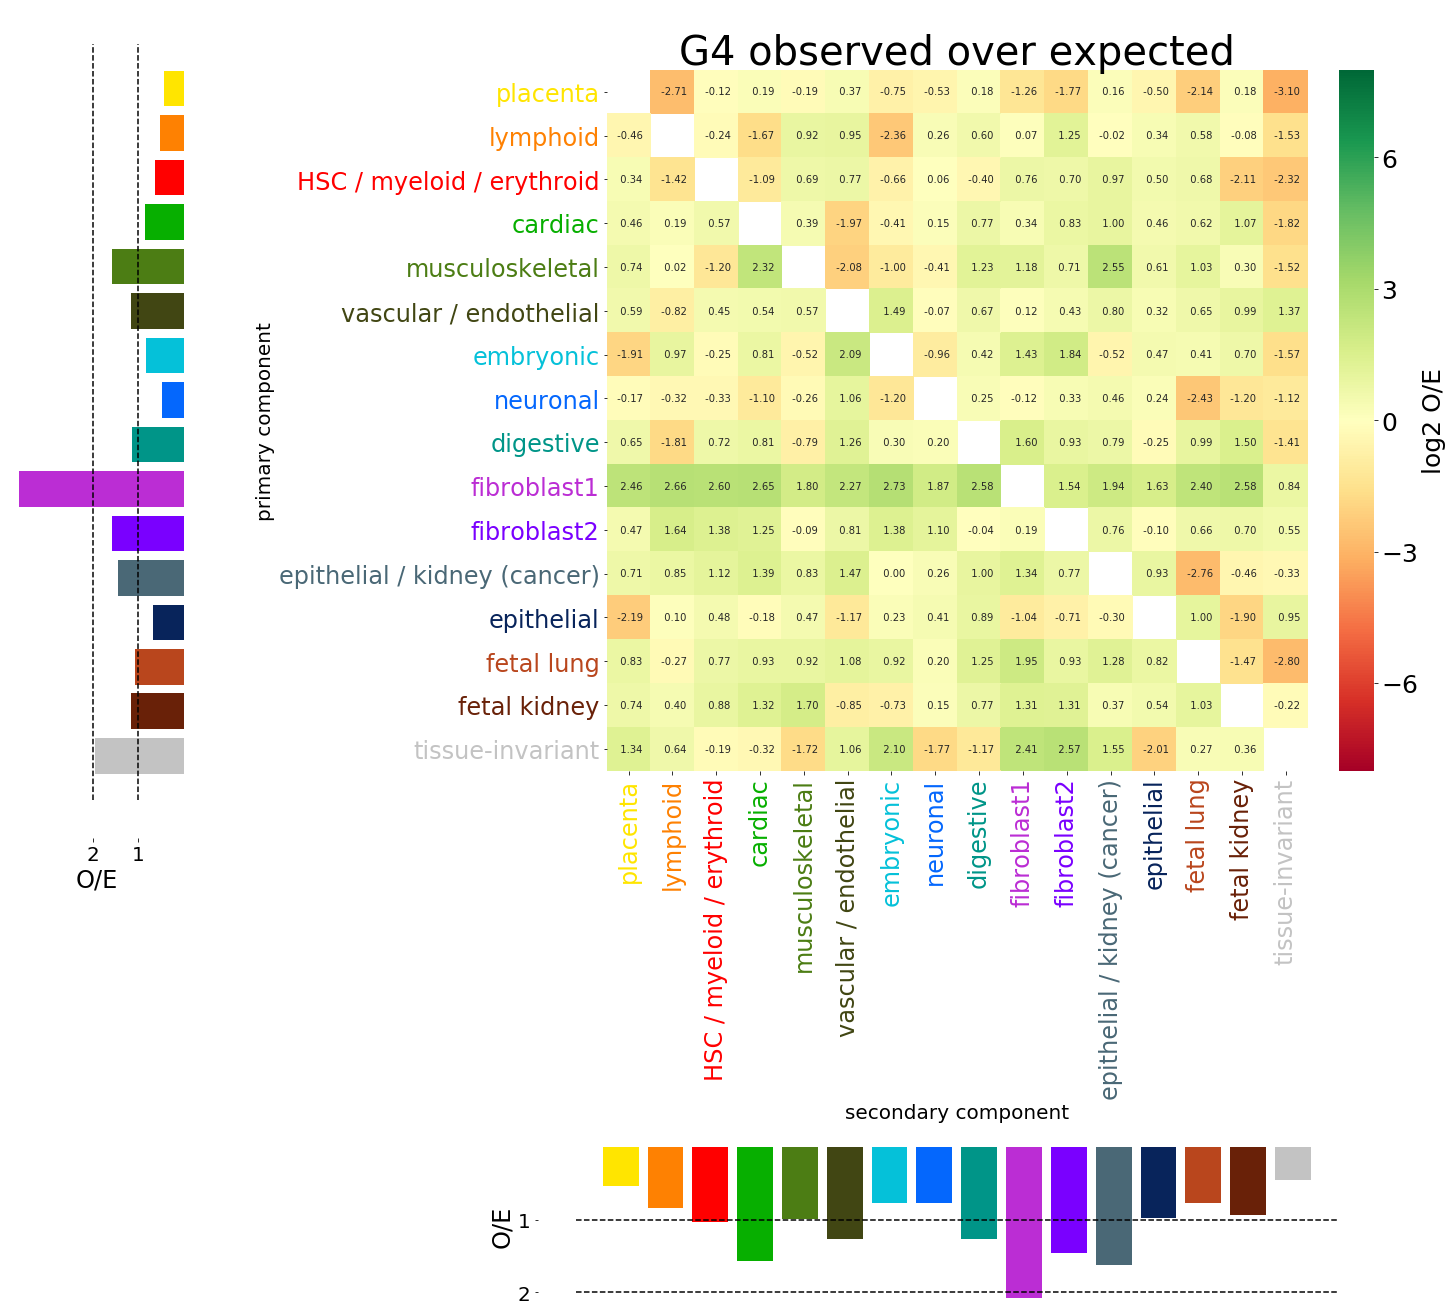

In [38]:
OV.big_grid_plot(G4cut, maxcolor, secondmaxcolor, maxcolor_vals, secondmaxcolor_vals, WSO, color_scheme,strings_of_labels, plt_title='G4 observed over expected',  logOOEmode = True, do_row_normalized_shading=False, ExpectedMatrix=EM)

### now fibroblast1 really comes alive. Tissue-invarient still kicking. 